# K-Nearest Neighbor Lab
Read over the sklearn info on [nearest neighbor learners](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)




In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 1 K-Nearest Neighbor (KNN) algorithm

### 1.1 (15%) Basic KNN Classification

Learn the [Glass data set](https://archive.ics.uci.edu/dataset/42/glass+identification) using [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) with default parameters.
- Randomly split your data into train/test.  Anytime we don't tell you specifics (such as what percentage is train vs test) choose your own reasonable values
- Give typical train and test set accuracies after running with different random splits
- Print the output probabilities for a test set (predict_proba)
- Try it with different p values (Minkowskian exponent) and discuss any differences

In [ ]:
!pip install ucimlrepo

In [ ]:
# Learn the glass data
from ucimlrepo import fetch_ucirepo

# fetch dataset
glass_identification = fetch_ucirepo(id=42)

# data (as pandas dataframes)
X = glass_identification.data.features
y = glass_identification.data.targets

# metadata
print(glass_identification.metadata)

# variable information
print(glass_identification.variables)

# glass_identification

{'uci_id': 42, 'name': 'Glass Identification', 'repository_url': 'https://archive.ics.uci.edu/dataset/42/glass+identification', 'data_url': 'https://archive.ics.uci.edu/static/public/42/data.csv', 'abstract': 'From USA Forensic Science Service; 6 types of glass; defined in terms of their oxide content (i.e. Na, Fe, K, etc)', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 214, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Type_of_glass'], 'index_col': ['Id_number'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1987, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5WW2P', 'creators': ['B. German'], 'intro_paper': None, 'additional_info': {'summary': 'Vina conducted a comparison test of her rule-based system, BEAGLE, the nearest-neighbor algorithm, and discriminant analysis.  BEAGLE is a product available through VRS Consulting, In

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

# Train the KNeighborsClassifier with default parameters
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict the test dataset
y_pred = knn.predict(X_test)

# Calculate and print the accuracy
train_accuracy = knn.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Train Accuracy: 0.7449664429530202
Test Accuracy: 0.6307692307692307


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Discussion

I loaded the data in and was able to use the API. The target column has many potential outputs and thus it is not wonderfully accurate on a stock KNN model becuase of the fact that there could be clusters that are smaller than 5. As I look at the standard of 5, I see that KNN is not about clustering but it is about looking at what is close and choosing the class by what is close. Maybe there isn't a good break point that makes these split well and that is why the accuracy is so low.

## 2 KNN Classification with normalization and distance weighting

Use the [magic telescope](https://axon.cs.byu.edu/data/uci_class/MagicTelescope.arff) dataset

### 2.1 (5%) - Without Normalization or Distance Weighting
- Do random 80/20 train/test splits each time
- Run with k=3 and *without* distance weighting and *without* normalization
- Show train and test set accuracy

In [1]:
# !wget https://axon.cs.byu.edu/data/uci_class/MagicTelescope.arff

--2023-11-08 23:11:55--  https://axon.cs.byu.edu/data/uci_class/MagicTelescope.arff
Resolving axon.cs.byu.edu (axon.cs.byu.edu)... 128.187.106.169
Connecting to axon.cs.byu.edu (axon.cs.byu.edu)|128.187.106.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1483335 (1.4M)
Saving to: ‘MagicTelescope.arff’

MagicTelescope.arff 100%[===================>]   1.41M  1.35MB/s    in 1.0s    

2023-11-08 23:11:57 (1.35 MB/s) - ‘MagicTelescope.arff’ saved [1483335/1483335]



In [ ]:
# Learn magic telescope data
from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the arff file
data, meta = arff.loadarff('MagicTelescope.arff')
magic_df = pd.DataFrame(data)


# Convert byte to strings
magic_df = magic_df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

magic_df.info()
magic_df['class:'].value_counts()

X = magic_df.drop('class:', axis=1)
y = magic_df['class:']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Train the KNeighborsClassifier with default parameters
knn = KNeighborsClassifier(n_neighbors=3, weights=None)
knn.fit(X_train, y_train)

# Predict the test dataset
y_pred = knn.predict(X_test)

# Calculate and print the accuracy
train_accuracy = knn.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fLength:   19020 non-null  float64
 1   fWidth:    19020 non-null  float64
 2   fSize:     19020 non-null  float64
 3   fConc:     19020 non-null  float64
 4   fConc1:    19020 non-null  float64
 5   fAsym:     19020 non-null  float64
 6   fM3Long:   19020 non-null  float64
 7   fM3Trans:  19020 non-null  float64
 8   fAlpha:    19020 non-null  float64
 9   fDist:     19020 non-null  float64
 10  class:     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB
Train Accuracy: 0.8860410094637224
Test Accuracy: 0.8070452155625657


When I ran this model, it gets an accuracy of 80%. The Train data has an accuracy closer to 90% which suggets it could be overfitting the training data. It was pretty good at being able to get a good accuracy in relation to the glass data but of course this is a different data set and maybe other models would be able to model this so much better than this KNN. Overall it seems good with almost no tuning and straight out of the box.

### 2.2 (10%) With Normalization
- Try it with k=3 without distance weighting but *with* normalization of input features.  You may use any reasonable normalization approach (e.g. standard min-max normalization between 0-1, z-transform, etc.)

In [ ]:
# Train/Predict with normalization
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
# Select only the continuous features
continuous_features = magic_df.columns[:10]

# Initialize the MinMaxScaler to scale between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform it
magic_df[continuous_features] = scaler.fit_transform(magic_df[continuous_features])

# Now the specified columns are normalized between 0 and 1
print(magic_df.head())

X = magic_df.drop('class:', axis=1)
y = magic_df['class:']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Train the KNeighborsClassifier with default parameters
knn = KNeighborsClassifier(n_neighbors=3, weights=None)
knn.fit(X_train, y_train)

# Predict the test dataset
y_pred = knn.predict(X_test)

# Calculate and print the accuracy
train_accuracy = knn.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')


   fLength:   fWidth:    fSize:    fConc:   fConc1:    fAsym:  fM3Long:  \
0  0.074306  0.062415  0.208043  0.430390  0.293229  0.470032  0.620576   
1  0.082815  0.045727  0.170668  0.587794  0.558601  0.468649  0.623756   
2  0.478241  0.530579  0.626818  0.027617  0.027263  0.556215  0.468201   
3  0.059212  0.037338  0.117445  0.683714  0.580679  0.469558  0.570630   
4  0.214774  0.120603  0.360674  0.345153  0.271003  0.437870  0.632050   

   fM3Trans:   fAlpha:    fDist: class:  
0   0.512493  0.445467  0.163066      g  
1   0.507944  0.070677  0.412679      g  
2   0.416540  0.855111  0.516926      g  
3   0.515219  0.116100  0.233582      g  
4   0.590373  0.051644  0.718582      g  
Train Accuracy: 0.9006309148264984
Test Accuracy: 0.8280757097791798


With just improving the standard scaling, it was able to make an accuracy jump of about 3 percent. This data model which is measuirng distances, would benefit greatly for min max scaling which of course we can see here. I imagine that depending on the dataset it can be more or less helpful in improving accuracy.

### 2.3 (10%) With Distance Weighting
- Try it with k=3 and with distance weighting *and* normalization

In [ ]:
#Train/Precdict with normalization and distance weighting
# Train/Predict with normalization
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
# Using the same data from before so no need to do the scaling here

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Train the KNeighborsClassifier with default parameters
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(X_train, y_train)

# Predict the test dataset
y_pred = knn.predict(X_test)

# Calculate and print the accuracy
train_accuracy = knn.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')


Train Accuracy: 1.0
Test Accuracy: 0.8354363827549948


So this is interesting becasue the train accuracy was able to get up to pretty much 100% which is very high. I guess that distance weighting which looks at the inverse distance or takes into account more heavily the closer weights than the farther ones which would make sense in terms of accurately classifying the data.

### 2.4 (10%) Different k Values
- Using your normalized data with distance weighting, create one graph with classification accuracy on the test set on the y-axis and k values on the x-axis.
- Use values of k from 1 to 15.  Use the same train/test split for each.

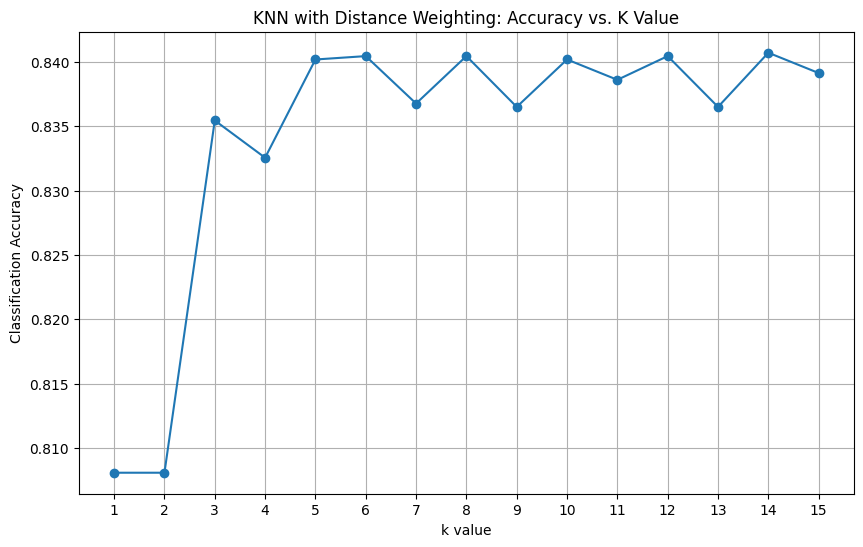

In [ ]:
# Calculate and Graph classification accuracy vs k values
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Prepare to store accuracies for different values of k
k_values = range(1, 16)
accuracies = []

# Run KNeighborsClassifier for k from 1 to 15
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN with Distance Weighting: Accuracy vs. K Value')
plt.xlabel('k value')
plt.ylabel('Classification Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

This data shows an interesting pattern that the test accuracy doesn't get really at all past 85% but it definitely improves quite a bit as you increase the n_nearest neighbors you look at. With a dataset looking at over 1900 input rows, I would assume that it would take way more k neigbors to make this drop off and get much worse. I think with the graoh you would likely choose some number between 5 anf 8 for the accuracy that you would want to use based on lower complexity with occams razor.

## 3 KNN Regression with normalization and distance weighting

Use the [sklean KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor) on the [housing price prediction](https://axon.cs.byu.edu/data/uci_regression/housing.arff) problem.  
### 3.1 (5%) Ethical Data
Note this data set has an example of an inappropriate input feature which we discussed.  State which feature is inappropriate and discuss why.

*Discuss the innapropriate feature*
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks
%                  by town

This attribute right here called B is talking about the proportion of Blacks in the area. In theory this should have no real effect on the dataset if there was perfect equality and so the presence of this attribute can suggest perpetuation of racism in the classification. If race goes into the price of a house, it is likely prejudice by nature.

### 3.2 (15%) - KNN Regression
- Do random 80/20 train/test splits each time
- Run with k=3
- Print the score (coefficient of determination) and Mean Absolute Error (MAE) for the train and test set for the cases of
  - No input normalization and no distance weighting
  - Normalization and no distance weighting
  - Normalization and distance weighting
- Normalize inputs features where needed but do not normalize the output

In [17]:
# !wget https://axon.cs.byu.edu/data/uci_regression/housing.arff

--2023-11-08 23:25:02--  https://axon.cs.byu.edu/data/uci_regression/housing.arff
Resolving axon.cs.byu.edu (axon.cs.byu.edu)... 128.187.106.169
Connecting to axon.cs.byu.edu (axon.cs.byu.edu)|128.187.106.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43733 (43K)
Saving to: ‘housing.arff’

housing.arff        100%[===================>]  42.71K   206KB/s    in 0.2s    

2023-11-08 23:25:03 (206 KB/s) - ‘housing.arff’ saved [43733/43733]



In [ ]:
# Learn and experiment with housing price prediction data
# Learn magic telescope data
from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler


# Load the arff file
data, meta = arff.loadarff('housing.arff')
house_df = pd.DataFrame(data)


# Convert byte to strings
house_df = house_df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
house_df.info()


X = house_df.drop('MEDV', axis=1)
y = house_df['MEDV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Train the KNeighborsClassifier with default parameters
knn = KNeighborsRegressor(n_neighbors=3, weights=None)
knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize KNeighborsRegressor with no distance weighting
knn_norm = KNeighborsRegressor(n_neighbors=3)
knn_norm.fit(X_train_scaled, y_train)

# Make predictions on the scaled train and test sets
y_pred_train_norm = knn_norm.predict(X_train_scaled)
y_pred_test_norm = knn_norm.predict(X_test_scaled)

# Calculate the train and test scores and MAEs
train_score_norm = knn_norm.score(X_train_scaled, y_train)
test_score_norm = knn_norm.score(X_test_scaled, y_test)
train_mae_norm = mean_absolute_error(y_train, y_pred_train_norm)
test_mae_norm = mean_absolute_error(y_test, y_pred_test_norm)

# Initialize KNeighborsRegressor with distance weighting
knn_dist = KNeighborsRegressor(n_neighbors=3, weights='distance')
knn_dist.fit(X_train_scaled, y_train)

# Make predictions on the scaled train and test sets
y_pred_train_dist = knn_dist.predict(X_train_scaled)
y_pred_test_dist = knn_dist.predict(X_test_scaled)

# Calculate the train and test scores and MAEs
train_score_dist = knn_dist.score(X_train_scaled, y_train)
test_score_dist = knn_dist.score(X_test_scaled, y_test)
train_mae_dist = mean_absolute_error(y_train, y_pred_train_dist)
test_mae_dist = mean_absolute_error(y_test, y_pred_test_dist)

# Gather all the results in a DataFrame
results_df = pd.DataFrame({
    'Method': ['No normalization / No distance weighting', 'Normalization / No distance weighting', 'Normalization / Distance weighting'],
    'Train Score': [train_score, train_score_norm, train_score_dist],
    'Test Score': [test_score, test_score_norm, test_score_dist],
    'Train MAE': [train_mae, train_mae_norm, train_mae_dist],
    'Test MAE': [test_mae, test_mae_norm, test_mae_dist]
})

range_df = house_df.drop('CHAS', axis=1).max() - house_df.drop('CHAS', axis=1).min()

print(range_df)

results_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    object 
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(13), object(1)
memory usage: 55.5+ KB
CRIM          88.96988
ZN           100.00000
INDUS         27.28000
NOX            0.48600
RM             5.21900
AGE           97.10000
DIS           10.99690
RAD           23.00000
TAX        71204.00000
PTRATIO        9.40000
B  

,Method,Train Score,Test Score,Train MAE,Test MAE
0,No normalization / No distance weighting,0.779036,0.499915,2.858498,4.714379
1,Normalization / No distance weighting,0.889404,0.676287,1.906023,3.271895
2,Normalization / Distance weighting,1.000000,0.717480,0.000000,3.059460


*Discuss your results*
So the normalization and the distnace weighting is the classic problem that can happen with overfitting on the dataset when there the normalized data makes the data points really close fit perfectly into the model training. The problem is that it overfit. The knn with 3 neighbors and no normalization or weighting did extremely poorly with a test set of 50 percent. I think this makes sense though because the lack of normalization makes the ranges of all of the data really wide and not consistently wide or proportionally wide. You can see this with the range of the tax column having a tax ratio being 71000 where the NOX column is less than 1.

### 3.3 (10%)  Different k Values
- Using housing with normalized data and distance weighting, create one graph with MAE on the test set on the y-axis and k values on the x-axis
- Use values of k from 1 to 15.  Use the same train/test split for each.

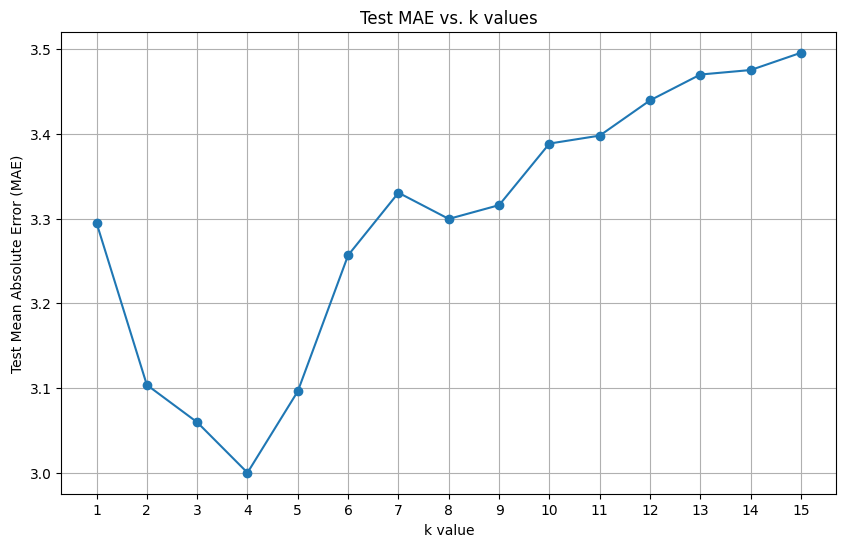

In [ ]:
# Learn and graph for different k values
import matplotlib.pyplot as plt

# Prepare lists to store MAEs for different values of k
mae_test_values = []

# Loop over values of k from 1 to 15
for k in range(1, 16):
    # Initialize KNeighborsRegressor with current k and distance weighting
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance')

    # Train the model using the normalized data
    knn.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred_test = knn.predict(X_test_scaled)

    # Calculate the test MAE
    mae_test = mean_absolute_error(y_test, y_pred_test)

    # Append the test MAE to the list
    mae_test_values.append(mae_test)

# Plotting the MAE values against k values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), mae_test_values, marker='o')
plt.title('Test MAE vs. k values')
plt.xlabel('k value')
plt.ylabel('Test Mean Absolute Error (MAE)')
plt.xticks(range(1, 16))
plt.grid(True)
plt.show()


Discussion
So this makes sense to me. There is a stark graph here that shows a strong drop of from the data getting more accurate for the first 4 neighbors but then it gets progressivley more inaccurate. This makes sense to me because the data normalized would look for the closest points but as we take into account more neigbors, we are going to start overfitting. and looking at points that should not be looked at. Here we see for this dataset that just purley on the neighbors with no other tuning, we are going to get best results with 4.

## 4. (20%) KNN with nominal and real data

- Use the [lymph dataset](https://axon.cs.byu.edu/data/uci_class/lymph.arff)
- Use a 80/20 split of the data for the training/test set
- This dataset has both continuous and nominal attributes
- Implement a distance metric which uses Euclidean distance for continuous features and 0/1 distance for nominal. Hints:
    - Write your own distance function (e.g. mydist) and use clf = KNeighborsClassifier(metric=mydist)
    - Change the nominal features in the data set to integer values since KNeighborsClassifier expects numeric features. I used Label_Encoder on the nominal features.
    - Keep a list of which features are nominal which mydist can use to decide which distance measure to use
    - There was an occasional bug in SK version 1.3.0 ("Flags object has no attribute 'c_contiguous'") that went away when I upgraded to the lastest SK version 1.3.1
- Use your own choice for k and other parameters

In [ ]:
!wget https://axon.cs.byu.edu/data/uci_class/lymph.arff

--2023-11-08 02:16:05--  https://axon.cs.byu.edu/data/uci_class/lymph.arff
Resolving axon.cs.byu.edu (axon.cs.byu.edu)... 128.187.106.169
Connecting to axon.cs.byu.edu (axon.cs.byu.edu)|128.187.106.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22513 (22K)
Saving to: ‘lymph.arff’

lymph.arff          100%[===================>]  21.99K  --.-KB/s    in 0.07s   

2023-11-08 02:16:06 (314 KB/s) - ‘lymph.arff’ saved [22513/22513]



In [ ]:
def mydist(x, y):
    """
    Custom distance metric.
    Uses Euclidean distance for continuous features and 0/1 distance for nominal.
    """
    # Separate continuous and nominal features using their indices
    cont_dist = np.sqrt(np.sum((x[continuous_indices] - y[continuous_indices]) ** 2))

    # 0/1 distance for nominal features
    nom_dist = sum(1 for i, (xi, yi) in enumerate(zip(x, y)) if xi != yi and i not in continuous_indices)

    # Combine the two distances
    return cont_dist + nom_dist


In [ ]:
# Train/Predict lymph with your own distance metric
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load the dataset
data, meta = arff.loadarff('lymph.arff')
lymph_df = pd.DataFrame(data)

# Convert byte strings to normal strings
lymph_df = lymph_df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Initialize LabelEncoder and encode the nominal columns and the class column
label_encoders = {}
for column in lymph_df.columns:
    if lymph_df[column].dtype == object:  # This will include the class column
        le = LabelEncoder()
        lymph_df[column] = le.fit_transform(lymph_df[column])
        label_encoders[column] = le

# Split data into features and target
X = lymph_df.drop('class', axis=1)
y = lymph_df['class']

# Define the nominal columns list after encoding
nominal_cols = [column for column in lymph_df.columns if column in label_encoders]

# Split the data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify continuous feature indices for distance calculation
continuous_features = X.columns.difference(nominal_cols)
continuous_indices = [X.columns.get_loc(col) for col in continuous_features]

# Define the custom distance function (or make sure it is imported if defined elsewhere)
# Ensure that 'mydist' is defined here or imported if it is in another cell

# Train the KNeighborsClassifier with the custom distance metric
clf = KNeighborsClassifier(n_neighbors=5, metric=mydist)
clf.fit(X_train.values, y_train.values)  # Use values to pass arrays to the classifier

# Predict on the test set
y_pred = clf.predict(X_test.values)  # Use values here as well

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8


\*Explain your distance metric and discuss your results*

My mydist function calculates the euclidian distance for the instancees that are cont and then for the nominal features it separates them. For these nominal features, it applies a simple 0/1 distance metric, which is similar to the Hamming distance. This metric compares the elements of the nominal features and increments the distance by 1 for every mismatch. If two nominal feature values are the same, the distance does not increase; if they are different, the distance increases by 1. Then function then sums the distances calculated for a single dist value.

The results that I got were ok. I got an accuracy of .8 which falls on par close to the accuracies I was getting with the other methods of distance calculation. Overall I think it is a good method.

## 5. (Optional 15% extra credit) Code up your own KNN Learner
Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below
- Use Euclidean distance to decide closest neighbors
- Implement both the classification and regression versions
- Include optional distance weighting for both algorithms
- Run your algorithm on the magic telescope and housing data sets above and discuss and compare your results

*Discussion*

My implementation of the KNN model is mult functional for the classification and the regression tasks. I used euclidian distance for this dataset as given. Overall the changes that I had to make that are different from the normal model classification had to do with the model name of course haha and also the datatype pass in is more rigid. I had to debug lots of issues to do with the type columns and rows and once I got it to floats and stuff, it worked well. The housing dataset performed alright but the magic dataset was better scoring a pretty similar accuracy to what I was getting on the actual knn model.

In [20]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy.stats import mode
from scipy.spatial.distance import cdist
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
from scipy.stats import mode

class KNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, k=3, weight_type='uniform', mode='classification'):
      """
        Args:
            columntype for each column tells you if continues[real] or if nominal[categoritcal].
            weight_type: inverse_distance voting or if non distance weighting. Options = ["no_weight","inverse_distance"]
        """
        self.k = k
        self.weight_type = weight_type
        self.mode = mode
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
      """ Fit the data; run the algorithm (for this lab really just saves the data :D)
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 2D numpy array with the training targets
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        self.X_train = np.array(X, dtype=float)
        # Convert labels to integer
        self.y_train = np.array(y, dtype=int)
        return self

    def euclidean_distance(self, x, y):
        return np.sqrt(np.sum((x - y) ** 2, axis=1))

    def predict(self, X):
      """ Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        X = np.array(X, dtype=float)
        distances = cdist(X, self.X_train)
        nearest_idx = np.argsort(distances, axis=1)[:, :self.k]
        nearest_labels = self.y_train[nearest_idx]

        if self.mode == 'classification':
            if self.weight_type == 'uniform':
                return mode(nearest_labels, axis=1).mode.ravel()
            else:
                votes = np.zeros((X.shape[0], np.unique(self.y_train).size))
                for i in range(X.shape[0]):
                    for j in range(self.k):
                        votes[i, nearest_labels[i, j]] += 1 / (distances[i, j] + 1e-5)
                return np.argmax(votes, axis=1)
        else:
            if self.weight_type == 'uniform':
                return np.mean(nearest_labels, axis=1)
            else:
                predictions = np.zeros(X.shape[0])
                for i in range(X.shape[0]):
                    weighted_sum = 0
                    weight_sum = 0
                    for j in range(self.k):
                        weight = 1 / (distances[i, j] + 1e-5)
                        weighted_sum += weight * self.y_train[nearest_idx[i, j]]
                        weight_sum += weight
                    predictions[i] = weighted_sum / weight_sum
                return predictions

    def score(self, X, y):
       """ Return accuracy of model on a given dataset. Must implement own score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """
        predictions = self.predict(X)
        if self.mode == 'classification':
            return np.mean(predictions == y)
        else:
            ss_res = np.sum((y - predictions) ** 2)
            ss_tot = np.sum((y - np.mean(y)) ** 2)
            return 1 - (ss_res / ss_tot)


In [21]:
# Load the arff file
data, meta = arff.loadarff('housing.arff')
house_df = pd.DataFrame(data)

# Convert byte strings to normal strings
house_df = house_df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Convert 'CHAS' to a numeric value. If 'CHAS' is a binary categorical feature, we can map it to 0 and 1.
print(house_df['CHAS'].value_counts())

print(house_df)

# Now convert all columns to numeric
house_df = house_df.apply(pd.to_numeric)

# Check the info to ensure all columns are now numeric
house_df.info()

X = house_df.drop('MEDV', axis=1).values
y = house_df['MEDV'].values.astype(float)  # Use float which is equivalent to np.float64

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize your custom KNN classifier for regression
my_knn = KNNClassifier(k=12, weight_type='inverse_distance', mode='regression')

# Fit the model on the training data
my_knn.fit(X_train, y_train)

# Predict on the test set
y_pred = my_knn.predict(X_test)

# Score the model on the test set
score = my_knn.score(X_test, y_test)

print(f'Test set score: {score}')


0    471
1     35
Name: CHAS, dtype: int64
        CRIM   ZN  INDUS CHAS    NOX     RM   AGE     DIS   RAD      TAX  \
0    0.02731  0.0   7.07    0  0.469  6.421  78.9  4.9671   2.0    242.0   
1    0.02729  0.0   7.07    0  0.469  7.185  61.1  4.9671   2.0    242.0   
2    0.03237  0.0   2.18    0  0.458  6.998  45.8  6.0622   3.0    222.0   
3    0.06905  0.0   2.18    0  0.458  7.147  54.2  6.0622   3.0    222.0   
4    0.02985  0.0   2.18    0  0.458  6.430  58.7  6.0622   3.0    222.0   
..       ...  ...    ...  ...    ...    ...   ...     ...   ...      ...   
501  4.81213  0.0  18.10    0  0.713  6.701  90.0  2.5975  24.0    666.0   
502  4.34879  0.0  18.10    0  0.580  6.167  84.0  3.0334  24.0    666.0   
503  5.82401  0.0  18.10    0  0.532  6.242  64.7  3.4242  24.0    666.0   
504  0.20746  0.0  27.74    0  0.609  5.093  98.0  1.8226   4.0    711.0   
505  0.22438  0.0   9.69    0  0.585  6.027  79.7  2.4982   6.0  71391.0   

     PTRATIO       B  LSTAT  MEDV  
0       

In [22]:
# Learn magic telescope data
from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the arff file
data, meta = arff.loadarff('MagicTelescope.arff')
magic_df = pd.DataFrame(data)


# Convert byte to strings
magic_df = magic_df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Map 'g' to 0 and 'h' to 1 and convert the column to float
magic_df['class:'] = magic_df['class:'].map({'g': 0, 'h': 1}).astype(float)

# Split the data into features (X) and target (y)
X = magic_df.drop('class:', axis=1)
y = magic_df['class:']

# Check the unique values in 'y'
print(y.unique())

magic_df.info()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Convert all columns to numeric if any aren't
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')


# Initialize your custom KNN classifier for classification
my_knn = KNNClassifier(k=12, weight_type='inverse_distance', mode='classification')

# Fit the model on the training data
my_knn.fit(X_train, y_train)

# Predict on the test set
y_pred = my_knn.predict(X_test)

# Score the model on the test set
score = my_knn.score(X_test, y_test)

print(f'Test set score: {score}')


[0. 1.]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fLength:   19020 non-null  float64
 1   fWidth:    19020 non-null  float64
 2   fSize:     19020 non-null  float64
 3   fConc:     19020 non-null  float64
 4   fConc1:    19020 non-null  float64
 5   fAsym:     19020 non-null  float64
 6   fM3Long:   19020 non-null  float64
 7   fM3Trans:  19020 non-null  float64
 8   fAlpha:    19020 non-null  float64
 9   fDist:     19020 non-null  float64
 10  class:     19020 non-null  float64
dtypes: float64(11)
memory usage: 1.6 MB
Test set score: 0.8191377497371188
